In [4]:
#Netfix Data Analysis Project
#Introduction
# in this project, we will analyze the Netflix dataset to understand:
# - which country produce the most content
# -Movies vs TV Show comparison
# the goal is to uncover meaningful insights using pyhton libraries like matplotlib, Pandas, and Seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [6]:
df = pd.read_csv(r"C:\Users\Nikita Saha\Documents\netflix.csv")
df.drop(columns=['Title'], inplace = True)
df.head(30)
# print("Rows and Columns:",df.shape)
# df.info()
# df.describe()

,Show_Id,Category,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [7]:
df.isnull().sum()

Show_Id            0
Category           0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [8]:
print(df.columns)

Index(['Show_Id', 'Category', 'Director', 'Cast', 'Country', 'Release_Date',
       'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [9]:
# convert "Release Date" column to datetime format
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors = 'coerce')
#create new column with just the year
df['year_added'] = df['Release_Date'].dt.year

In [10]:
#Exploratory data Analysis(EDA)
# We will now explore different aspects of the dataset with visualisation

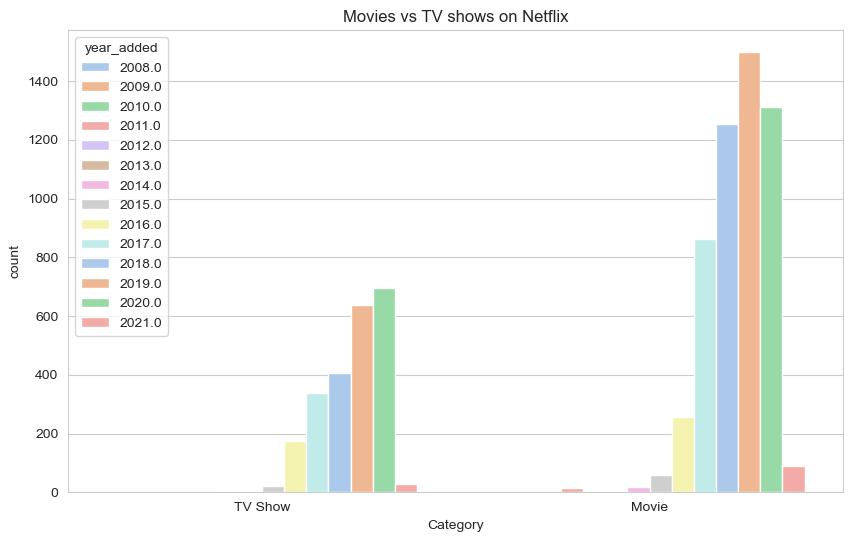

In [11]:
#Movies vs TV Shows
sns.countplot(x = 'Category', hue= 'year_added',data = df,palette = 'pastel')
plt.title('Movies vs TV shows on Netflix')
plt.xlabel('Category')
plt.show()

In [12]:
#Netflix has more movies than TV shows.
#However, TV shows are becoming more common in recent years. 

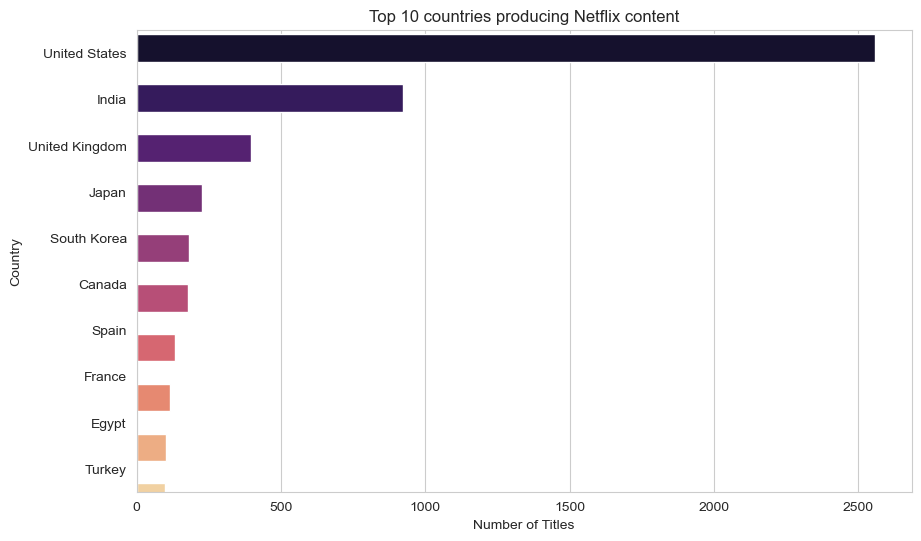

In [13]:
#Top 10 countries producing Netflix content
# we want to visualise which countries produce the most netflix titles. The chart below shows the Top countries 
# with thicker bars and readable labels

#Prepare data
top_countries = df['Country'].value_counts().head(10)

#prepare the plot
plt.figure(figsize=(10,6))
sns.barplot(x = top_countries.values,y = top_countries.index, hue = top_countries.index, palette = 'magma', dodge = 'False')
width = 1.0

#remove legend since hue is just for color
plt.legend([],[],frameon=False)

#titles and labels
plt.title('Top 10 countries producing Netflix content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

#increase bar thickness
for bar in plt.gca().patches:
    bar.set_height(0.6)
plt.show()

In [15]:
df.to_csv("netflix_cleaned.csv",index = False)